### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as ts
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
air = pd.read_csv("C:/Users/Luswata/Dropbox/ML_AI_UCBerkeley/MODULE_10_TimeSeries/data/AirPassengers.csv")
air.shape

(144, 2)

In [5]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
# covert dates to timestamp object
air['Month'] = pd.to_datetime(air['Month'], format='%Y-%m')

air['Year'] = air['Month'].dt.year
air

,Month,#Passengers,Year
0,1949-01-01,112,1949
1,1949-02-01,118,1949
2,1949-03-01,132,1949
3,1949-04-01,129,1949
4,1949-05-01,121,1949
...,...,...,...
139,1960-08-01,606,1960
140,1960-09-01,508,1960
141,1960-10-01,461,1960
142,1960-11-01,390,1960


In [8]:
# set Month as index and keep #Passengers
air = air.set_index(pd.to_datetime(air['Month']))
air = air[['#Passengers']]
air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
# Split the dataset into training/history and future
tdata = air[:"1958-12-31"]
fdata = air["1959-01-01":]

In [10]:
tdata.shape, fdata.shape

((120, 1), (24, 1))

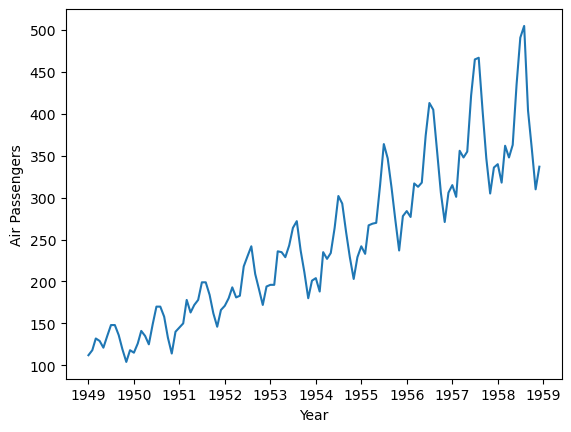

In [11]:
plt.plot(tdata)
plt.ylabel("Air Passengers")
plt.xlabel("Year")
plt.show()

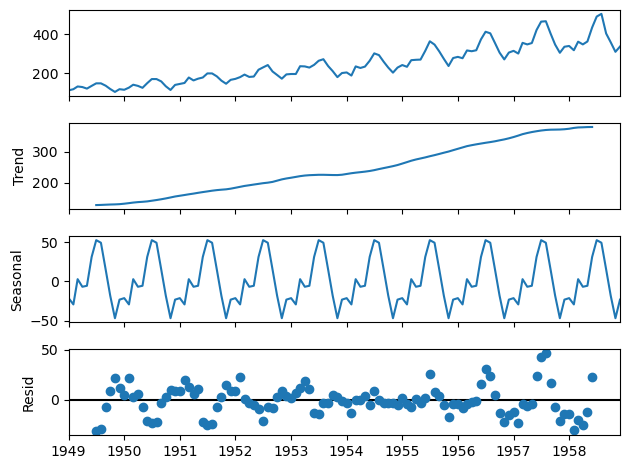

In [12]:
tsdec = ts.seasonal_decompose(x=tdata, model="additive",
                              two_sided=True)
tsdec.plot()
plt.show()

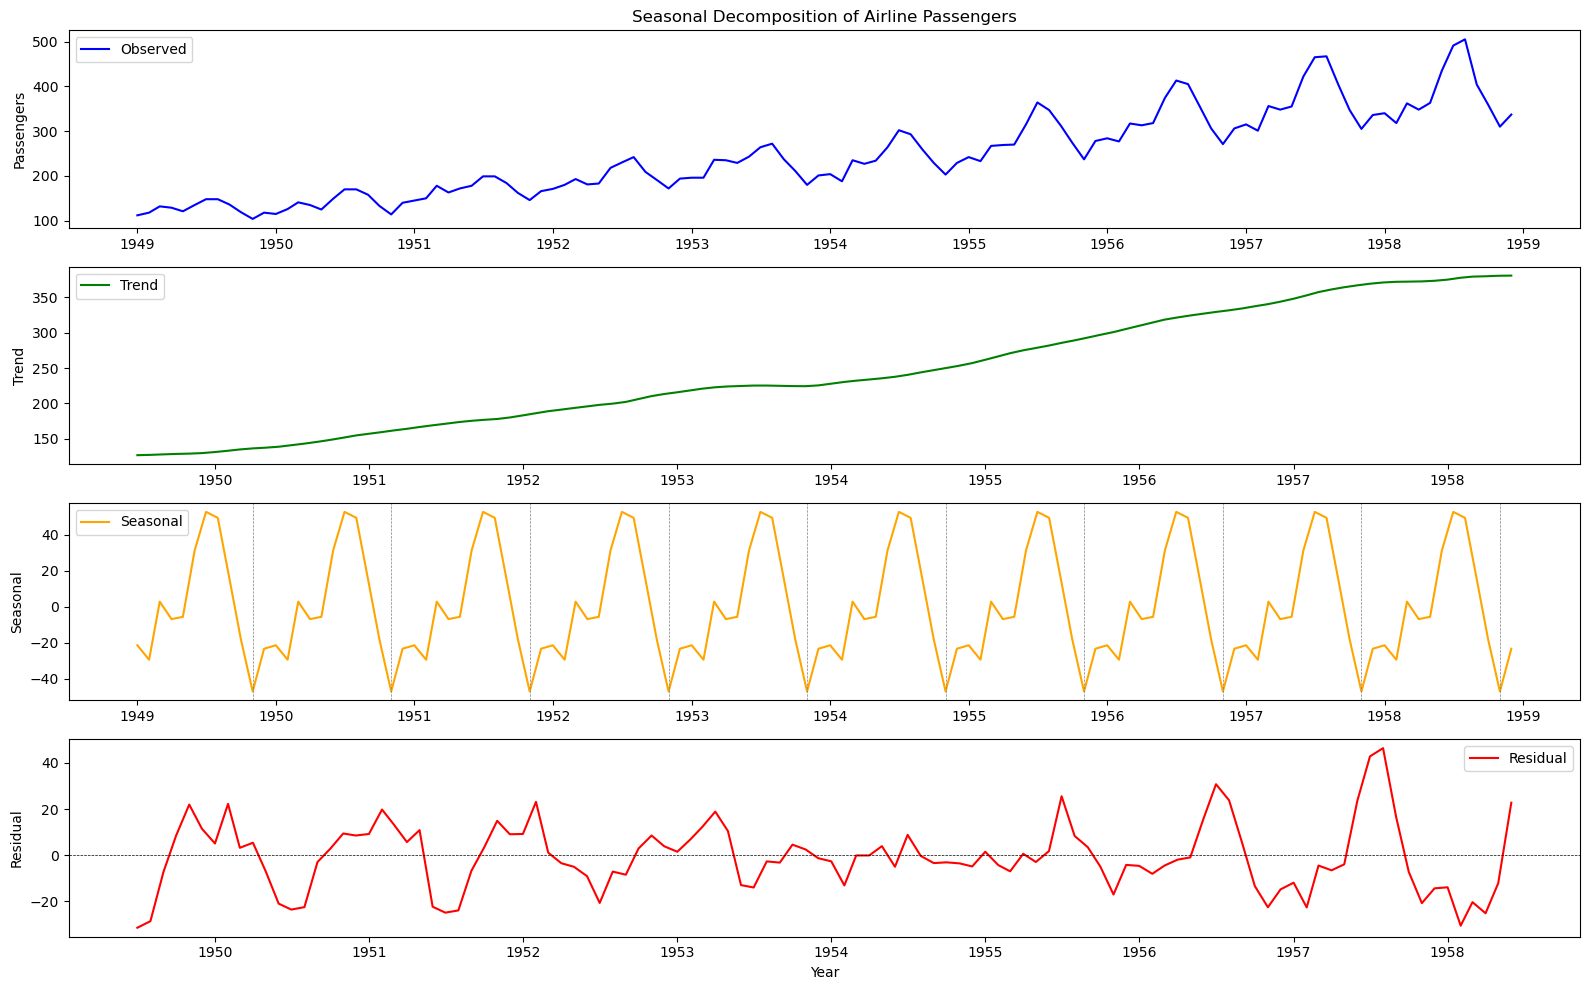

<Figure size 1200x600 with 0 Axes>

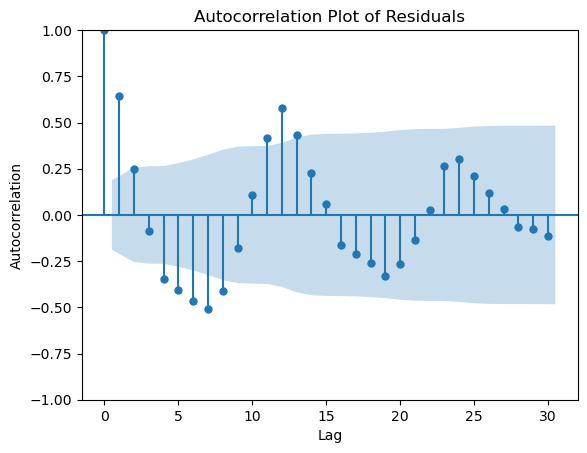

In [32]:
import numpy as np

# Perform seasonal decomposition
decomposition = seasonal_decompose(tdata['#Passengers'], model='additive')

# Plotting decomposition components with different colors and axis labels
plt.figure(figsize=(16, 10))

plt.subplot(411)
plt.plot(tdata.index, tdata['#Passengers'], label='Observed', color='blue')
plt.ylabel('Passengers')
plt.title('Seasonal Decomposition of Airline Passengers')
plt.legend()

plt.subplot(412)
plt.plot(tdata.index, decomposition.trend, label='Trend', color='green')
plt.ylabel('Trend')
plt.legend()

plt.subplot(413)
plt.plot(tdata.index, decomposition.seasonal, label='Seasonal', color='orange')
plt.ylabel('Seasonal')
plt.legend()

# Find indices of the lowest point of every year in the seasonal component
years = tdata.index.year.unique()
min_indices = []
for year in years:
    year_data = decomposition.seasonal[tdata.index.year == year]
    min_index = year_data.idxmin()
    min_indices.append(min_index)

# Adding vertical lines at the lowest points of each year
for index in min_indices:
    plt.axvline(x=index, color='gray', linestyle='--', linewidth=0.5)

plt.subplot(414)
plt.plot(tdata.index, decomposition.resid, label='Residual', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) 
plt.ylabel('Residual')
plt.xlabel('Year')
plt.legend()

plt.tight_layout()
plt.show()

# Autocorrelation plot for residuals
plt.figure(figsize=(12, 6))
plot_acf(decomposition.resid.dropna(), lags=30, alpha=0.05)
plt.title('Autocorrelation Plot of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [ ]:
# Numeric test for seasonality 


In [ ]:
# Durbin-Watson Statistic
The Durbin-Watson statistic tests for autocorrelation in the residuals of a regression or time series model. It ranges from 0 to 4, where:

A value near 2 indicates no autocorrelation.
Values significantly different from 2 indicate the presence of autocorrelation.

In [22]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic for residuals
dw_statistic = durbin_watson(decomposition.resid.dropna())

# Print the result
print(f"Durbin-Watson statistic: {dw_statistic}")

# Interpretation
if dw_statistic < 1.5:
    print("Positive autocorrelation may be present.")
elif dw_statistic > 2.5:
    print("Negative autocorrelation may be present.")
else:
    print("No significant autocorrelation detected.")


Durbin-Watson statistic: 0.6456919777031885
Positive autocorrelation may be present.


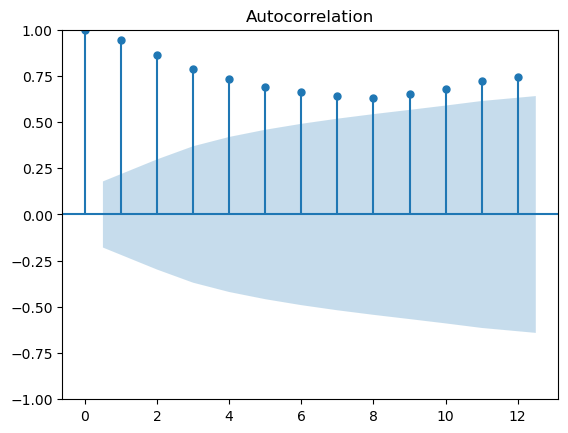

In [23]:

# 1. Autocorrelation at Seasonal Lags
from statsmodels.graphics.tsaplots import plot_acf

# Compute autocorrelation up to seasonal lag (e.g., lag 12 for monthly data)
seasonal_lag = 12
acf_result = plot_acf(tdata['#Passengers'], lags=seasonal_lag)

# Interpretation: Look for significant spikes at the seasonal lags
# Significant spikes in the autocorrelation plot at the seasonal lags indicate potential seasonality.

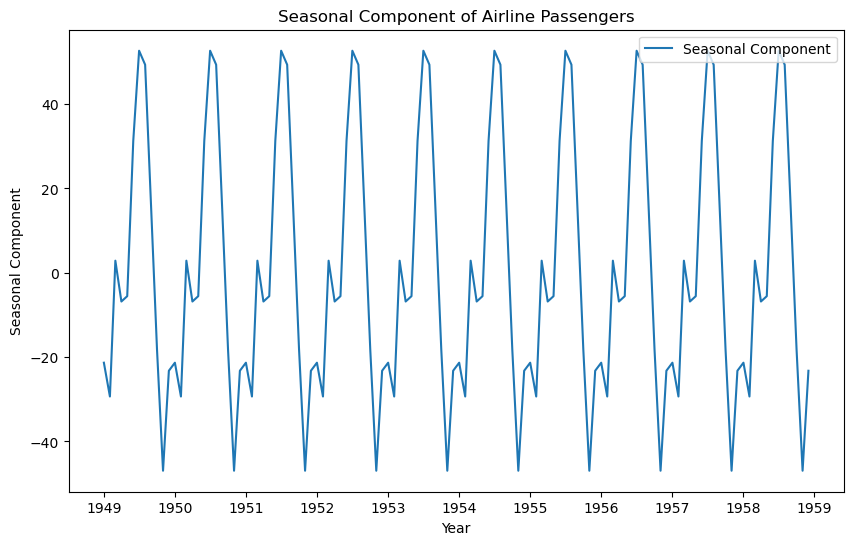

In [25]:
# Seasonal Decomposition and Residual Analysis

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(tdata['#Passengers'], model='additive')

# Check the seasonal component
seasonal_component = decomposition.seasonal

# Statistical tests or visual inspection of the seasonal component
# Example: Plot the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(tdata.index, seasonal_component, label='Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of Airline Passengers')
plt.legend()
plt.show()



In [ ]:
# Interpretation:  Recurring patterns in the seasonal component indicate seasonality in the data.

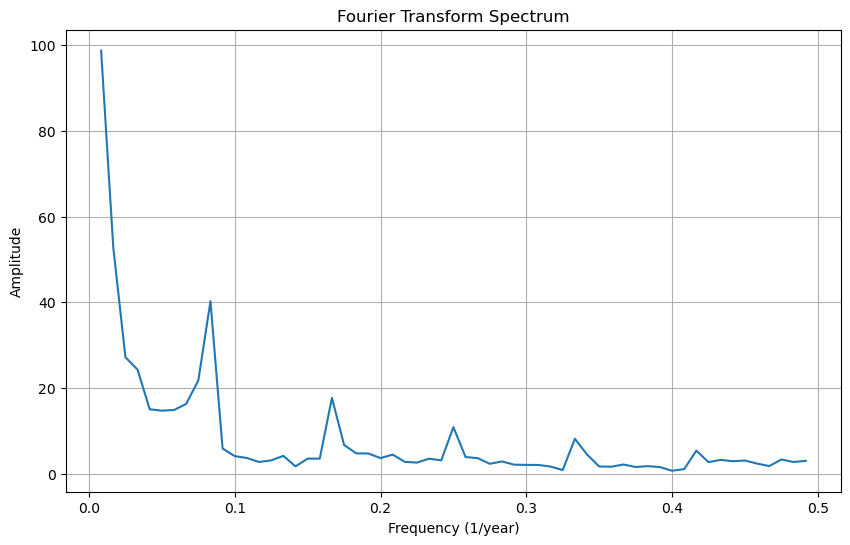

In [27]:
# Fourier Transform and Spectral Analysis

import numpy as np
from scipy.fft import fft, fftfreq

# Compute Fourier transform
n = len(tdata)
yf = fft(tdata['#Passengers'])
xf = fftfreq(n)

# Plot amplitude spectrum (ignore the DC component)
plt.figure(figsize=(10, 6))
plt.plot(xf[1:n//2], 2.0/n * np.abs(yf[1:n//2]))
plt.xlabel('Frequency (1/year)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform Spectrum')
plt.grid()
plt.show()

# Interpretation: Peaks in the amplitude spectrum at specific frequencies indicate dominant seasonal periods in the data.

In [33]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationary
result = adfuller(tdata)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret results
if result[1] < 0.05:
    print('Reject H0 - Time series is stationary')
else:
    print('Fail to reject H0 - Time series is non-stationary')


ADF Statistic: -0.7734607708969321
p-value: 0.8267937485032464
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Fail to reject H0 - Time series is non-stationary
